# City of Phoenix Crime 

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#read in datafile, convert to dataframe
data = pd.DataFrame(pd.read_csv('Resources/crime-data.csv', low_memory=False)).drop(['100 BLOCK ADDR', 'OCCURRED TO'], axis=1)

#Data cleansing & manipulation
#datatypes
data['INC NUMBER'] = data['INC NUMBER'].apply(str).replace('\.0', '', regex=True)
data['OCCURRED ON'] = data['OCCURRED ON'].astype(str)
data['UCR CRIME CATEGORY'] = data['UCR CRIME CATEGORY'].astype(str)
data['ZIP'] = data['ZIP'].apply(str).replace('\.0', '', regex=True)
data['PREMISE TYPE'] = data['PREMISE TYPE'].astype(str)

#regroup/rename
data.loc[data['PREMISE TYPE'] == '07A STOREROOM/SHED (COMMERCIAL)', ['PREMISE TYPE']] = 'STOREROOM / SHED'
data.loc[data['PREMISE TYPE'] == '07A STOREROOM/SHED (RESIDENTIAL)', ['PREMISE TYPE']] = 'STOREROOM / SHED'
data.loc[data['PREMISE TYPE'] == 'BAR / LOUNG / NIGHT CLUB', ['PREMISE TYPE']] = 'BAR / LOUNGE / NIGHTCLUB'
data.loc[data['PREMISE TYPE'] == 'GARAGE / CARPORT', ['PREMISE TYPE']] = 'GARAGE'
data.loc[data['PREMISE TYPE'] == 'CARPORT', ['PREMISE TYPE']] = 'GARAGE'
data.loc[data['PREMISE TYPE'] == 'BUS', ['PREMISE TYPE']] = 'ON THE BUS'
data.loc[data['PREMISE TYPE'] == 'FAST FOOD STORE', ['PREMISE TYPE']] = 'RESTAURANT'
data.loc[data['PREMISE TYPE'] == 'FOJ - PREMISE UNKNOWN', ['PREMISE TYPE']] = 'UNKNOWN'
data.loc[data['PREMISE TYPE'] == 'HOSPITAL', ['PREMISE TYPE']] = 'HOSPITAL / NURSING CARE'
data.loc[data['PREMISE TYPE'] == 'SCHOOL-COLLEGE/UNIVERSITY', ['PREMISE TYPE']] = 'SCHOOL/COLLEGE/CHILDCARE'
data.loc[data['PREMISE TYPE'] == 'SCHOOL-ELEMENTARY/SECONDARY', ['PREMISE TYPE']] = 'SCHOOL/COLLEGE/CHILDCARE'
data.loc[data['PREMISE TYPE'] == 'SCHOOL-OTHER', ['PREMISE TYPE']] = 'SCHOOL/COLLEGE/CHILDCARE'
data.loc[data['PREMISE TYPE'] == 'SINGLE FAMILY HOUSING', ['PREMISE TYPE']] = 'SINGLE FAMILY HOUSE'
data.loc[data['PREMISE TYPE'] == 'STREET / ROADWAY / ALLEY SIDEWALK', ['PREMISE TYPE']] = 'STREET / ROADWAY / ALLEY / SIDEWALK'
data.loc[data['PREMISE TYPE'] == 'RAIL STATION', ['PREMISE TYPE']] = 'TRAIN STATION'
data.loc[data['PREMISE TYPE'] == 'WAREHOUSE / FACTORY', ['PREMISE TYPE']] = 'INDUSTRIAL SITE'

#clean up data
data = data[data['PREMISE TYPE'] != 'NaN']
data = data[data['PREMISE TYPE'] != '']
data = data[data['ZIP'] != 'NaN']
data = data[data['ZIP'] != '']
data = data[data['OCCURRED ON'] != 'NaN']
data = data[data['OCCURRED ON'] != '']
#data = data[data['INC NUMBER'] != 'NaN'
#data = data[data['INC NUMBER'] != '']
data = data[data['UCR CRIME CATEGORY'] != 'NaN']

data['OCCURRED ON'] = pd.to_datetime(data['OCCURRED ON'])

#parse & add columns for year/month/day 
#YEAR = data['INC NUMBER'].str[:4].astype(int) #Inc number does not correspondd with Occurred on year in all cases
YEAR = data['OCCURRED ON'].dt.year
data['YEAR'] = YEAR.fillna(0.0).astype(int)
#data = data.rename(columns = {'INC NUMBER':'YEAR'})

MONTH = data['OCCURRED ON'].dt.month
DAY = data['OCCURRED ON'].dt.day

data['MONTH'] = MONTH.fillna(0.0).astype(int)
data['DAY'] = DAY.fillna(0.0).astype(int)

dayofweek = data['OCCURRED ON'].dt.weekday_name
data['DayofWeek'] = dayofweek


#drop unnecessary column
#data.drop(columns='INC NUMBER', inplace=True)


data.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,ZIP,PREMISE TYPE,YEAR,MONTH,DAY,DayofWeek
0,201500000000000,2015-11-01,MOTOR VEHICLE THEFT,85307,SINGLE FAMILY HOUSE,2015,11,1,Sunday
1,201500000000000,2015-11-01,MOTOR VEHICLE THEFT,85043,SINGLE FAMILY HOUSE,2015,11,1,Sunday
2,201600000000000,2015-11-01,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE,2015,11,1,Sunday
3,201500000000000,2015-11-01,LARCENY-THEFT,85014,PARKING LOT,2015,11,1,Sunday
4,201700000000000,2015-11-01,LARCENY-THEFT,85085,SINGLE FAMILY HOUSE,2015,11,1,Sunday


In [54]:
#remove year = 0 & 2015 (only 2 month of data)
data = data[data['YEAR'] > 2015] 
data.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,ZIP,PREMISE TYPE,YEAR,MONTH,DAY,DayofWeek
10169,201700000000000,2016-01-01,RAPE,85017,SINGLE FAMILY HOUSE,2016,1,1,Friday
10170,201700000000000,2016-01-01,LARCENY-THEFT,85029,MOBILE HOME,2016,1,1,Friday
10171,201600000000000,2016-01-01,MOTOR VEHICLE THEFT,85041,DRIVEWAY,2016,1,1,Friday
10172,201600000000000,2016-01-01,RAPE,85051,nan,2016,1,1,Friday
10173,201600000000000,2016-01-01,LARCENY-THEFT,85053,APARTMENT,2016,1,1,Friday


In [55]:
data.describe()

,YEAR,MONTH,DAY
count,242971.000000,242971.000000,242971.000000
mean,2017.409864,6.223483,15.598018
std,1.079566,3.353896,8.825087
min,2016.000000,1.000000,1.000000
25%,2016.000000,3.000000,8.000000
50%,2017.000000,6.000000,16.000000
75%,2018.000000,9.000000,23.000000
max,2019.000000,12.000000,31.000000


In [56]:
data['UCR CRIME CATEGORY'].value_counts()

LARCENY-THEFT                            123438
BURGLARY                                  38680
MOTOR VEHICLE THEFT                       25649
DRUG OFFENSE                              20519
AGGRAVATED ASSAULT                        18705
ROBBERY                                   10370
RAPE                                       3587
ARSON                                      1535
MURDER AND NON-NEGLIGENT MANSLAUGHTER       488
Name: UCR CRIME CATEGORY, dtype: int64

In [57]:
data['PREMISE TYPE'].value_counts().head(10)

SINGLE FAMILY HOUSE                    44520
APARTMENT                              27821
STREET / ROADWAY / ALLEY / SIDEWALK    25494
PARKING LOT                            24345
RETAIL BUSINESS                        18436
VEHICLE                                12608
CONVENIENCE MARKET / STORE              8871
DEPARTMENT / DISCOUNT STORE             8644
DRIVEWAY                                8522
GROCERY / SUPER MARKET                  6618
Name: PREMISE TYPE, dtype: int64

# Most common premise type for each crime category

In [59]:
cattype = data.groupby(['UCR CRIME CATEGORY', 'PREMISE TYPE']).count()[['OCCURRED ON']].sort_values(['UCR CRIME CATEGORY','OCCURRED ON'], ascending=False)#.nlargest(5,'OCCURRED ON')

#print(type(cattype))
cattype=cattype.rename(columns = {"OCCURRED ON":"OCCURRENCES"})

cattype=cattype.groupby(['UCR CRIME CATEGORY']).head(1).sort_values(by=['OCCURRENCES'], ascending=False)

cattype.to_csv ('PremiseTypeByCategory.csv', index=True, header=True)

cattype



,,OCCURRENCES
UCR CRIME CATEGORY,PREMISE TYPE,
BURGLARY,SINGLE FAMILY HOUSE,19085
LARCENY-THEFT,RETAIL BUSINESS,15968
MOTOR VEHICLE THEFT,PARKING LOT,6789
DRUG OFFENSE,STREET / ROADWAY / ALLEY / SIDEWALK,6131
AGGRAVATED ASSAULT,APARTMENT,4583
ROBBERY,STREET / ROADWAY / ALLEY / SIDEWALK,2642
RAPE,SINGLE FAMILY HOUSE,1079
ARSON,nan,693
MURDER AND NON-NEGLIGENT MANSLAUGHTER,SINGLE FAMILY HOUSE,101


# Most Common Premise Type

In [60]:
premtype = data.groupby(['PREMISE TYPE']).count()[['OCCURRED ON']]

#cattype = cattype.reset_index().sort_values(['UCR CRIME CATEGORY','OCCURRED ON'],ascending=False).set_index(['UCR CRIME CATEGORY','PREMISE TYPE'])

premtype = premtype.sort_values(by=['OCCURRED ON'], ascending=False)

premtype.head()

,OCCURRED ON
PREMISE TYPE,
SINGLE FAMILY HOUSE,44520
APARTMENT,27821
STREET / ROADWAY / ALLEY / SIDEWALK,25494
PARKING LOT,24345
RETAIL BUSINESS,18436


# Most common crime in Single Family Home



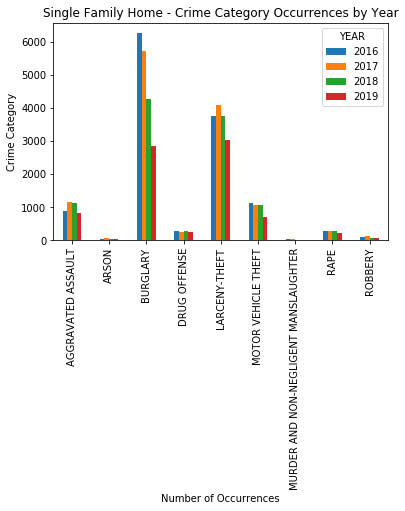

In [61]:
prem = data[data['PREMISE TYPE'] == "SINGLE FAMILY HOUSE"] 
premgroup = prem.groupby(['UCR CRIME CATEGORY', 'YEAR']).count()['OCCURRED ON'].reset_index()
premgrouppivot = premgroup.pivot(index='UCR CRIME CATEGORY', columns='YEAR', values='OCCURRED ON')
premgrouppivot.plot(kind='bar')
plt.xlabel("Number of Occurrences")
plt.ylabel("Crime Category")
plt.title("Single Family Home - Crime Category Occurrences by Year")
plt.savefig("Single Family Home - Crime Category Occurrences by Year.png", bbox_inches='tight')

# Crime Category by Year (what is the most common)

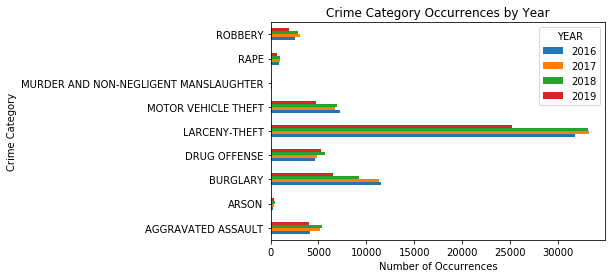

In [62]:
#most common crime each year
catyear = data.groupby(['YEAR','UCR CRIME CATEGORY']).count()['OCCURRED ON'].reset_index()
catyearpivot = catyear.pivot(index='UCR CRIME CATEGORY', columns='YEAR', values='OCCURRED ON')
catyearpivot.plot(kind='barh')
plt.xlabel("Number of Occurrences")
plt.ylabel("Crime Category")
plt.title("Crime Category Occurrences by Year")
plt.savefig("Crime Category Occurrences by Year.png", bbox_inches='tight')


# Crime by Zip code 

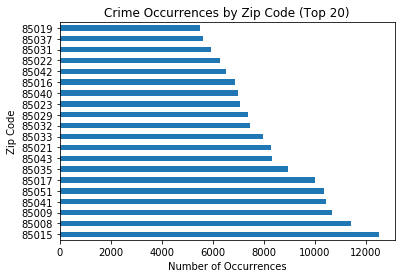

In [63]:
#total by zip
#5 - Most crime-prone ZIP
datazip = data["ZIP"].groupby(data["ZIP"]).count().sort_values(ascending=False)
datazip.head(20).plot(kind="barh")
plt.xlabel("Number of Occurrences")
plt.ylabel("Zip Code")
plt.title("Crime Occurrences by Zip Code (Top 20)")
plt.savefig("Crime Rates by Zip Code.png")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

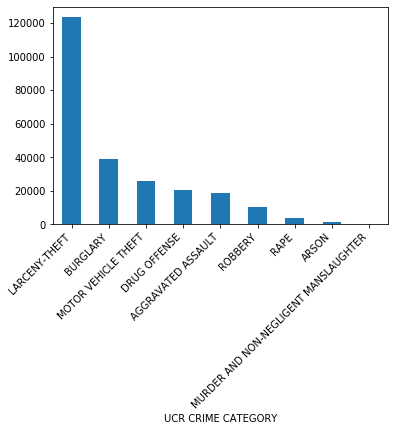

In [64]:
#total by type
datacat = data["UCR CRIME CATEGORY"].groupby(data["UCR CRIME CATEGORY"]).count().sort_values(ascending=False)
datacat.plot(kind="bar")
plt.xticks(rotation=45, horizontalalignment="right")

# Crime Rates by Month

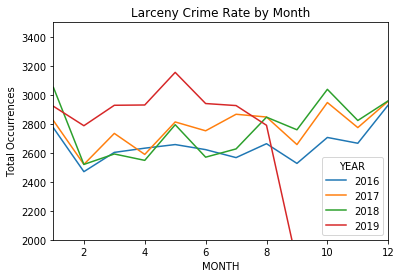

In [65]:
#4 - Relationship between crimes and date
#larceny (highest crime) by month
larceny =  data['UCR CRIME CATEGORY']=="LARCENY-THEFT"
datalarceny = data[larceny]

crimemonth = datalarceny.groupby(['YEAR','MONTH']).count()['OCCURRED ON'].reset_index()

crimemonthpivot = crimemonth.pivot(index='MONTH', columns='YEAR', values='OCCURRED ON')
crimemonthpivot.plot(kind='line')
plt.xlim(1,12)
plt.ylim(2000, 3500)
plt.title("Larceny Crime Rate by Month")
plt.ylabel("Total Occurrences")
plt.savefig("Larceny Rates by Month.png")


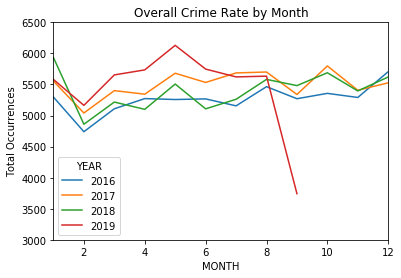

In [66]:
#4 - Relationship between crimes and date
#all crime by month
allcrimemonth = data.groupby(['YEAR','MONTH']).count()['OCCURRED ON'].reset_index()

allcrimemonth = allcrimemonth.pivot(index='MONTH', columns='YEAR', values='OCCURRED ON')
allcrimemonth.plot(kind='line')
plt.xlim(1,12)
plt.ylim(3000, 6500)
plt.title("Overall Crime Rate by Month")
plt.ylabel("Total Occurrences")
plt.savefig("Overall Crime Rates by Month.png")